# INF6405 - TP2: Analyse des Résultats Expérimentaux

Graphiques pour le rapport du TP2.



In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Style des graphiques
sns.set_theme(style="whitegrid")

## Section 4.1: Algorithmes Glouton et Recuit Simulé

### 4.1.1 Impact de RandFactor

In [3]:
df_411 = pd.read_csv('results/4.1.1_randfactor.csv')

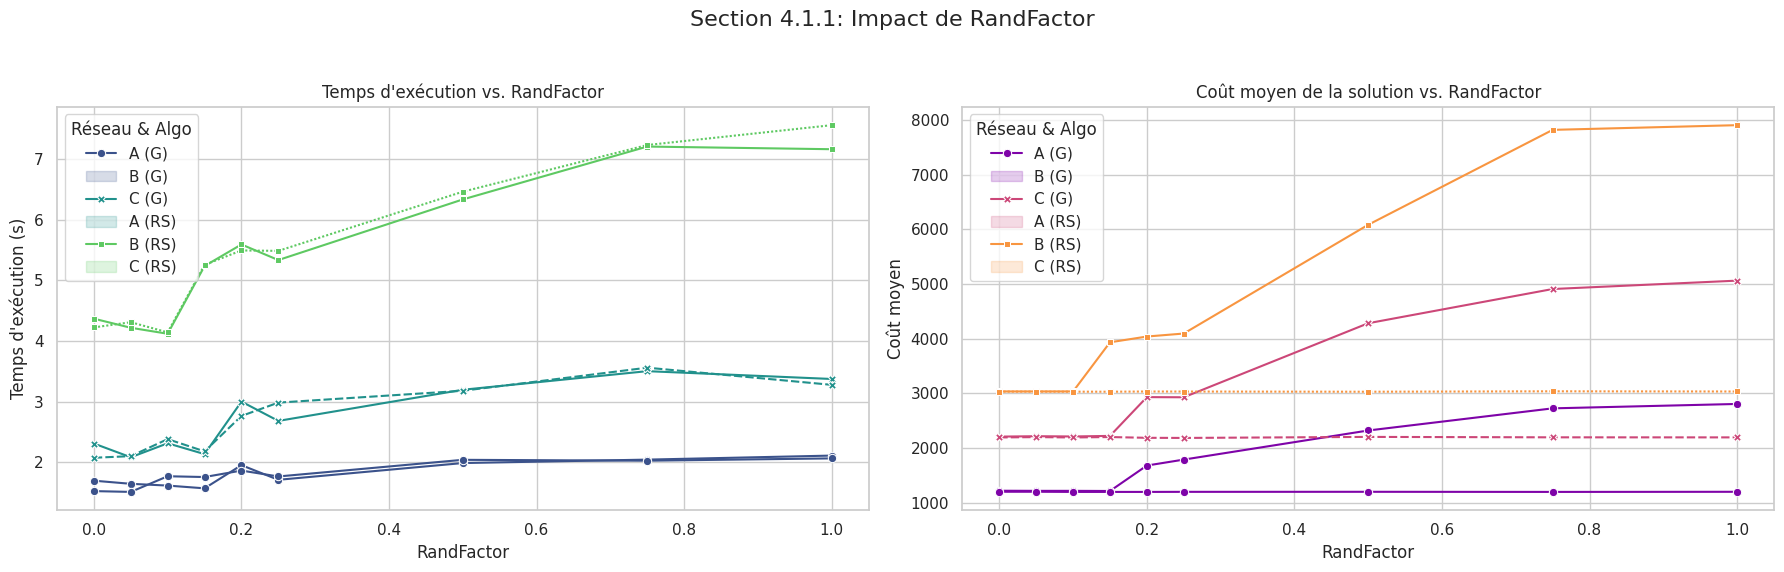

In [4]:
fig, axes = plt.subplots(1, 2, figsize=(18, 6))
fig.suptitle("Section 4.1.1: Impact de RandFactor", fontsize=16)

# Graphique 1: Temps d'exécution
sns.lineplot(data=df_411, x='RandFactor', y='G_Time', hue='Network', style='Network', markers=True, dashes=False, ax=axes[0], palette='viridis', legend=False)
sns.lineplot(data=df_411, x='RandFactor', y='RS_Time', hue='Network', style='Network', markers=True, dashes=True, ax=axes[0], palette='viridis')
axes[0].set_title("Temps d'exécution vs. RandFactor")
axes[0].set_xlabel("RandFactor")
axes[0].set_ylabel("Temps d'exécution (s)")
axes[0].legend(title='Réseau & Algo', labels=['A (G)', 'B (G)', 'C (G)', 'A (RS)', 'B (RS)', 'C (RS)'])

# Graphique 2: Coût moyen
sns.lineplot(data=df_411, x='RandFactor', y='G_Avg_Cost', hue='Network', style='Network', markers=True, dashes=False, ax=axes[1], palette='plasma', legend=False)
sns.lineplot(data=df_411, x='RandFactor', y='RS_Avg_Cost', hue='Network', style='Network', markers=True, dashes=True, ax=axes[1], palette='plasma')
axes[1].set_title("Coût moyen de la solution vs. RandFactor")
axes[1].set_xlabel("RandFactor")
axes[1].set_ylabel("Coût moyen")
axes[1].legend(title='Réseau & Algo', labels=['A (G)', 'B (G)', 'C (G)', 'A (RS)', 'B (RS)', 'C (RS)'])

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

### 4.1.2 TFactor et TPalier

In [5]:
df_412 = pd.read_csv('results/4.1.2_tfactor_tpalier.csv')

# Get the corresponding Glouton best costs for the chosen RandFactor (0.4)
# We'll approximate with RandFactor=0.5 from the previous table for calculation.
df_glouton_ref = df_411[df_411['RandFactor'].isin([0.25, 0.5])].groupby('Network')['G_Best_Cost'].mean().reset_index()
df_glouton_ref = df_glouton_ref.rename(columns={'G_Best_Cost': 'Glouton_Best_Cost'})

df_412 = pd.merge(df_412, df_glouton_ref, on='Network')
df_412['Improvement_Ratio'] = (df_412['Glouton_Best_Cost'] - df_412['Best_Cost']) / df_412['Glouton_Best_Cost']

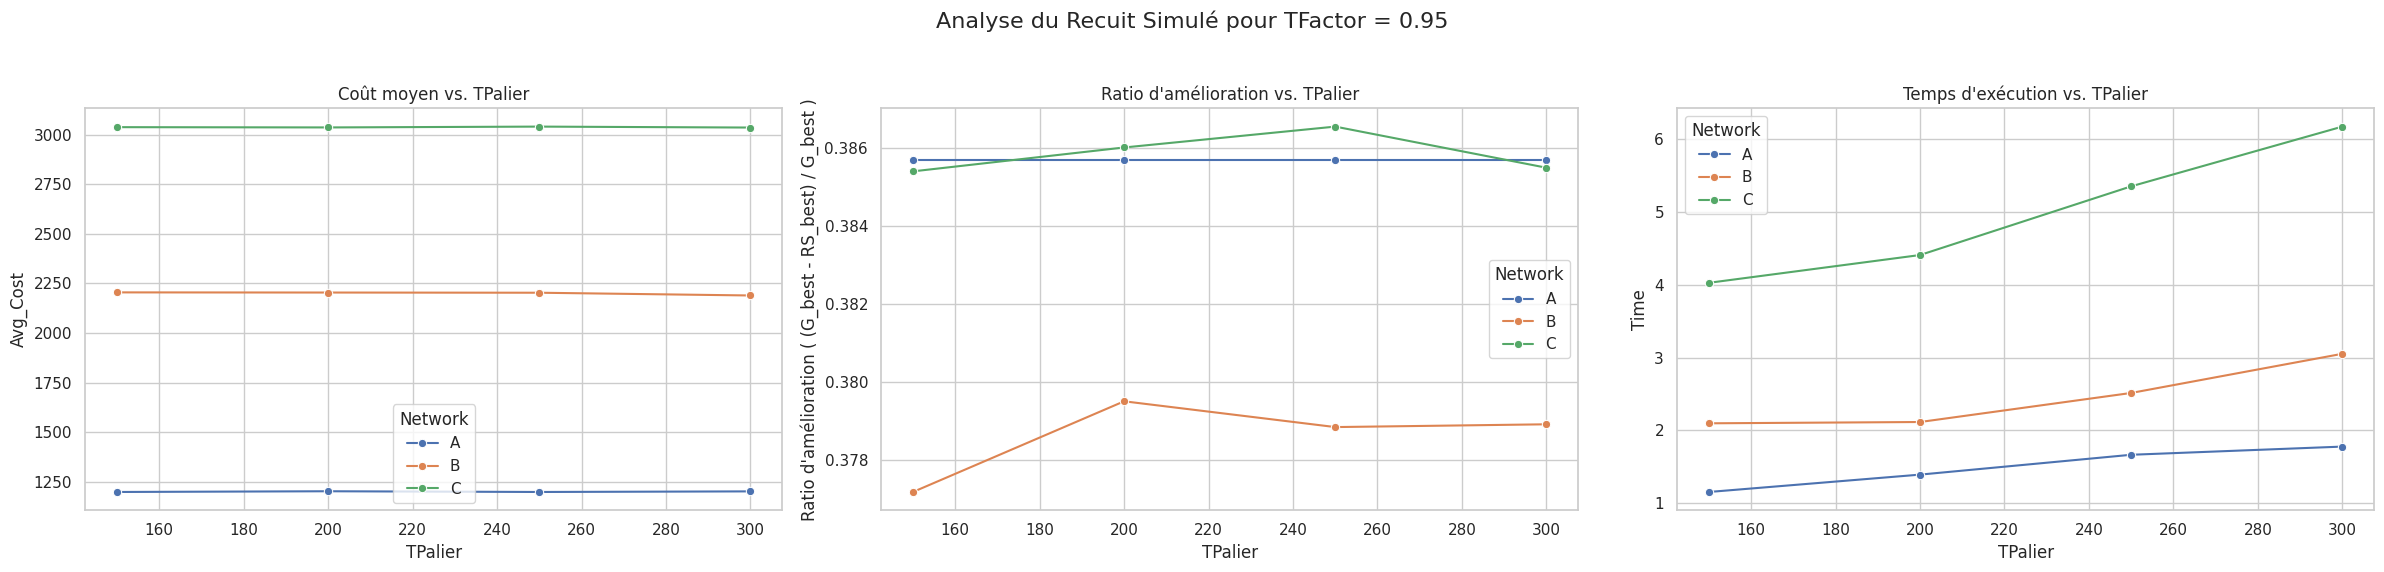

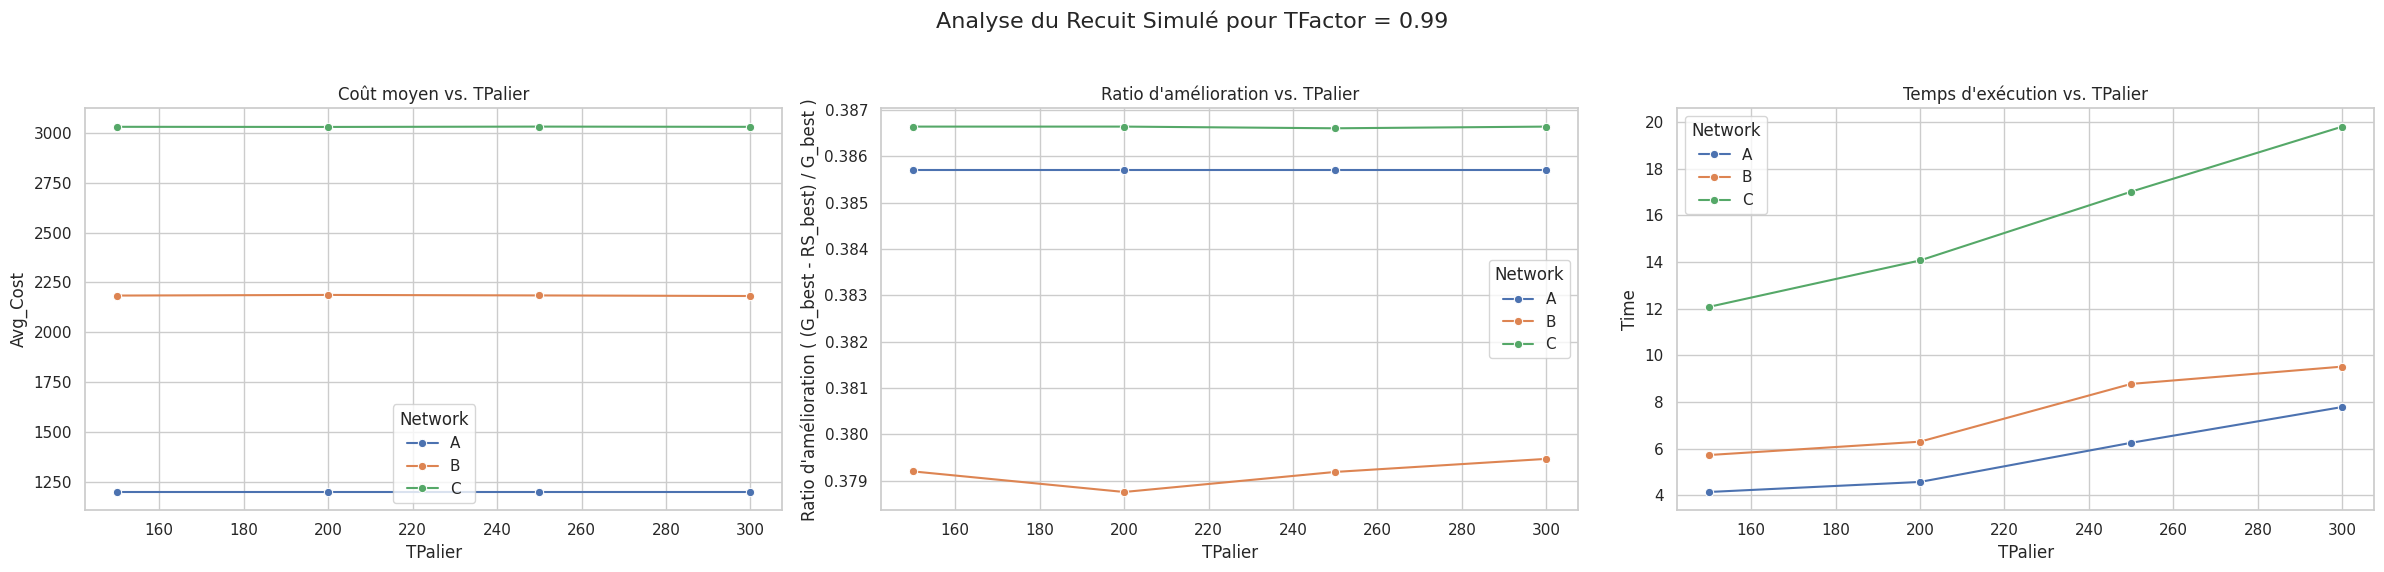

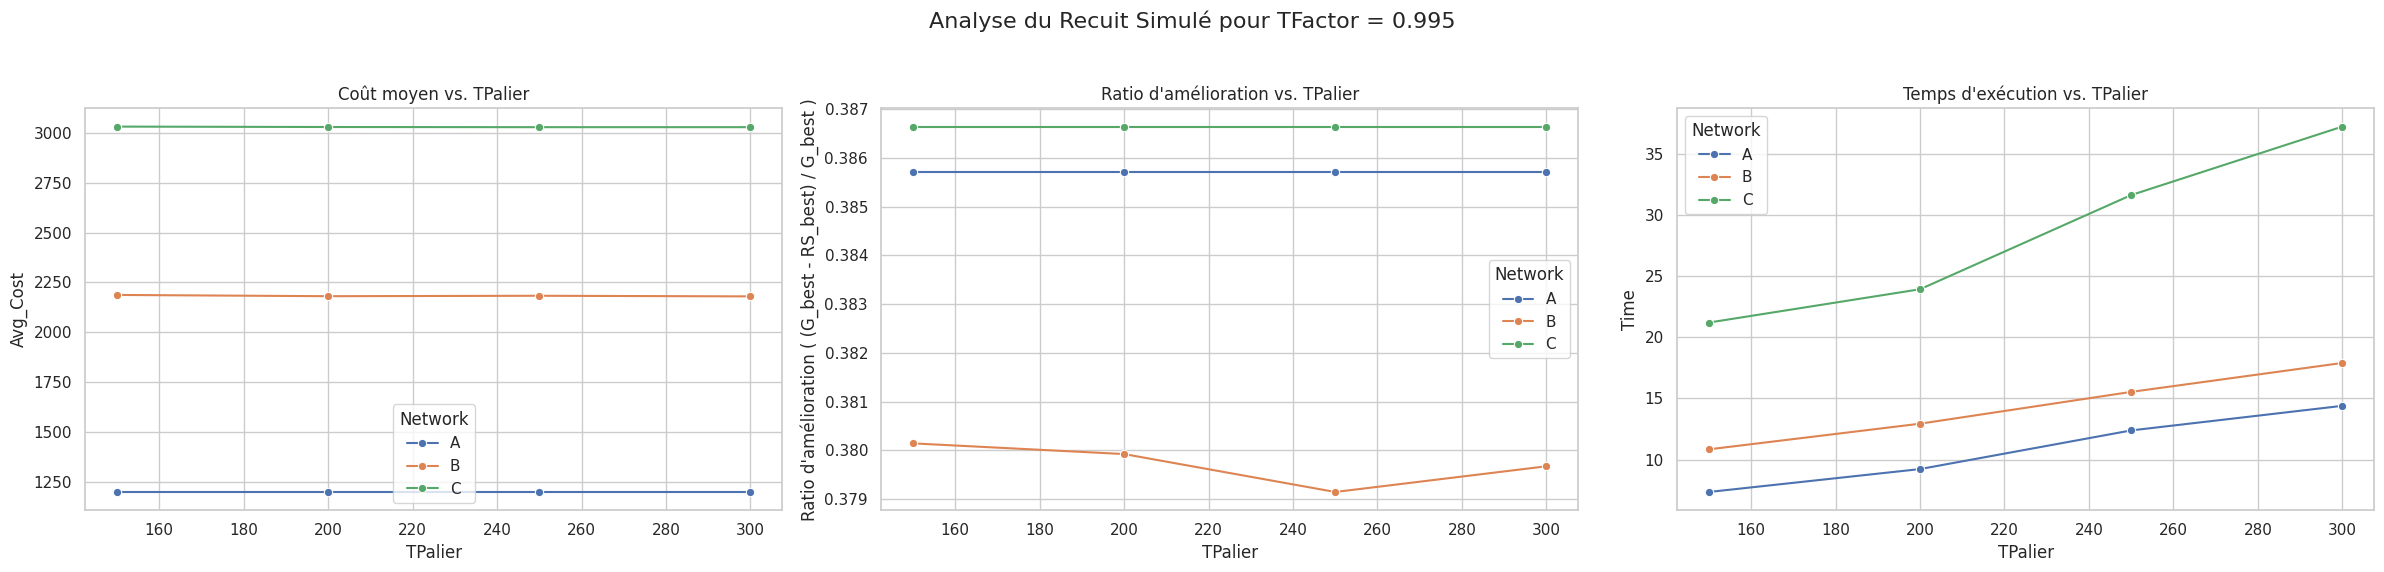

In [6]:
for tf in df_412['TFactor'].unique():
    df_subset = df_412[df_412['TFactor'] == tf]
    
    fig, axes = plt.subplots(1, 3, figsize=(24, 6))
    fig.suptitle(f'Analyse du Recuit Simulé pour TFactor = {tf}', fontsize=16)

    sns.lineplot(data=df_subset, x='TPalier', y='Avg_Cost', hue='Network', marker='o', ax=axes[0])
    axes[0].set_title("Coût moyen vs. TPalier")

    sns.lineplot(data=df_subset, x='TPalier', y='Improvement_Ratio', hue='Network', marker='o', ax=axes[1])
    axes[1].set_title("Ratio d'amélioration vs. TPalier")
    axes[1].set_ylabel("Ratio d'amélioration ( (G_best - RS_best) / G_best )")

    sns.lineplot(data=df_subset, x='TPalier', y='Time', hue='Network', marker='o', ax=axes[2])
    axes[2].set_title("Temps d'exécution vs. TPalier")

    for ax in axes: ax.set_xlabel("TPalier")
    plt.tight_layout(rect=[0, 0.03, 1, 0.95])
    plt.show()

## Section 4.2: Algorithme Génétique

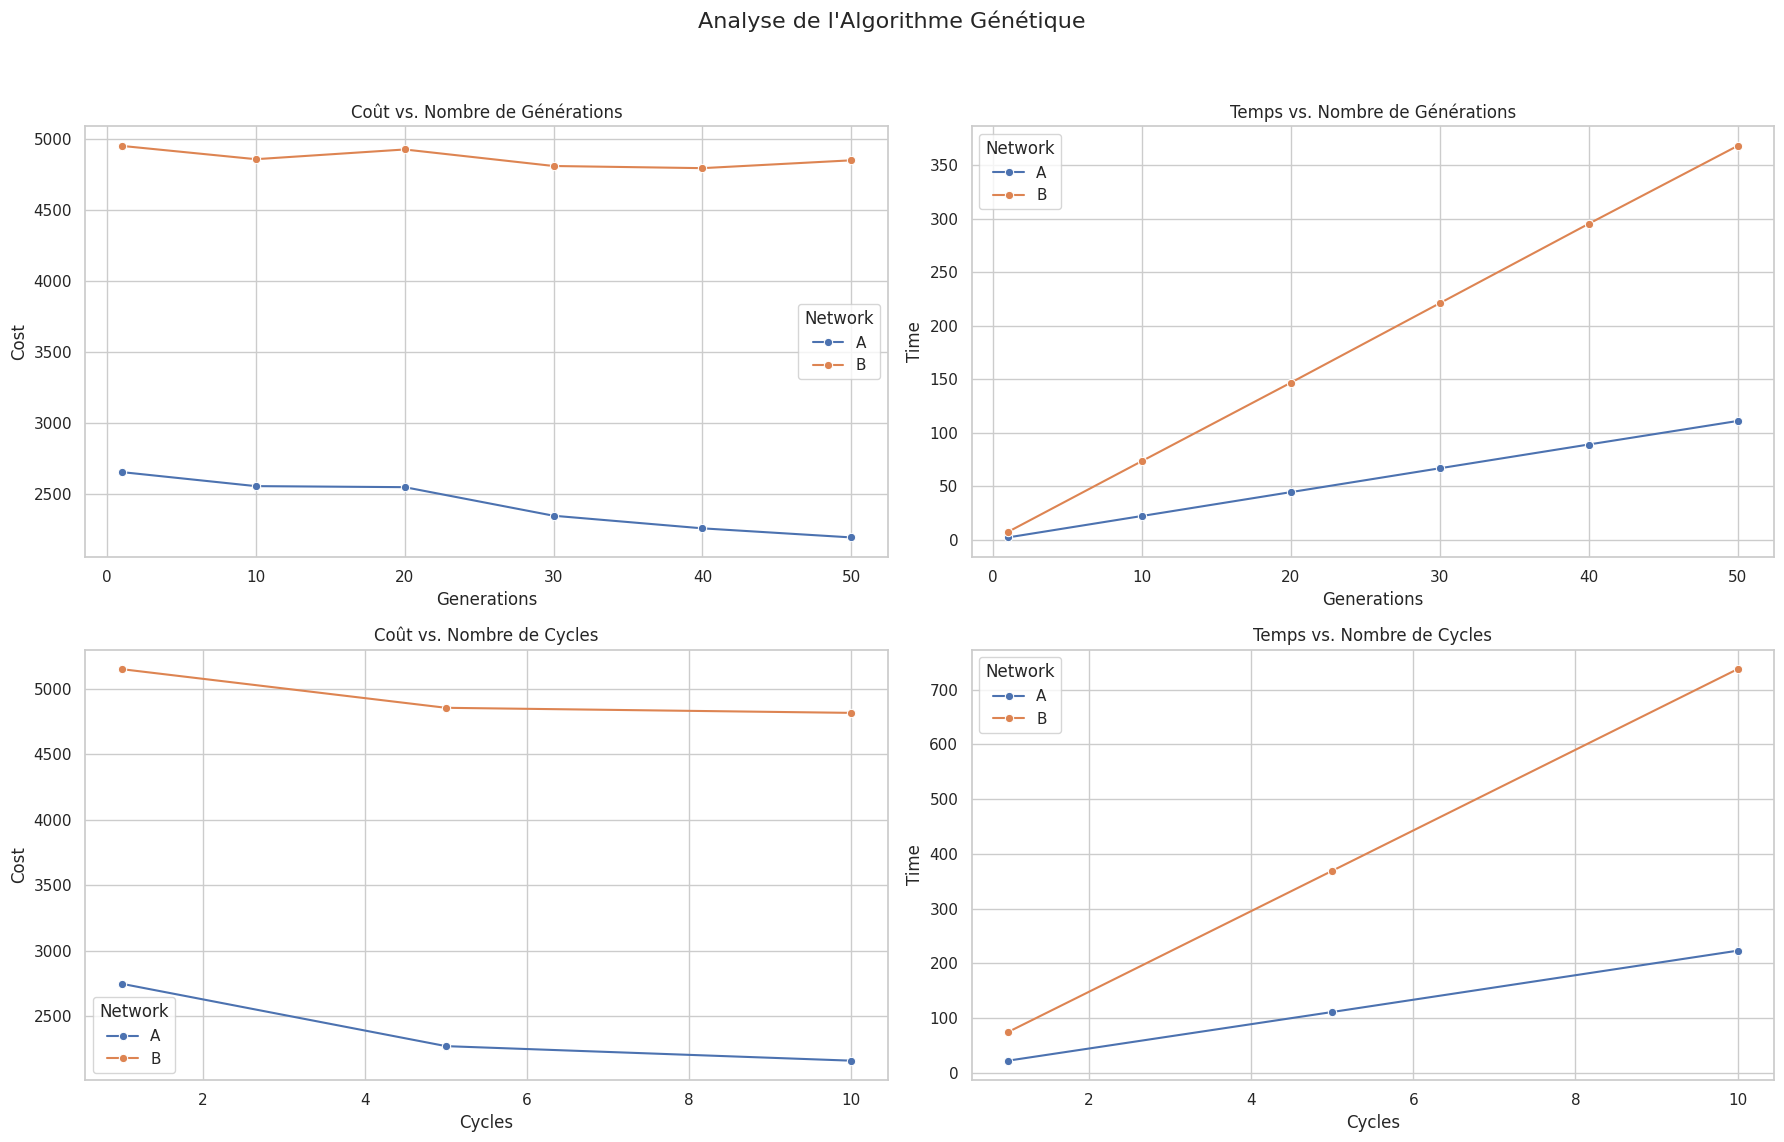

Table 4.2.3: Influence des probabilités de croisement et mutation
Crossover_Prob       0.10       0.50       0.90       0.95
Mutation_Prob                                             
0.05            2457.2106  2206.2739  1581.8804  2357.3407
0.10            2529.9094  1550.5513  1565.3029  2418.3112
0.20            2035.8896  1446.0896  1450.9781  1464.8752
0.90            1482.1915  1560.8349  1509.6760  1474.9714


In [7]:
df_421 = pd.read_csv('results/4.2.1_generations.csv')
df_422 = pd.read_csv('results/4.2.2_cycles.csv')
df_423 = pd.read_csv('results/4.2.3_probabilities.csv')

fig, axes = plt.subplots(2, 2, figsize=(18, 12))
fig.suptitle('Analyse de l\'Algorithme Génétique', fontsize=16)

sns.lineplot(data=df_421, x='Generations', y='Cost', hue='Network', marker='o', ax=axes[0,0])
axes[0,0].set_title('Coût vs. Nombre de Générations')

sns.lineplot(data=df_421, x='Generations', y='Time', hue='Network', marker='o', ax=axes[0,1])
axes[0,1].set_title('Temps vs. Nombre de Générations')

sns.lineplot(data=df_422, x='Cycles', y='Cost', hue='Network', marker='o', ax=axes[1,0])
axes[1,0].set_title('Coût vs. Nombre de Cycles')

sns.lineplot(data=df_422, x='Cycles', y='Time', hue='Network', marker='o', ax=axes[1,1])
axes[1,1].set_title('Temps vs. Nombre de Cycles')

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

print("Table 4.2.3: Influence des probabilités de croisement et mutation")
df_423_pivot = df_423.pivot(index='Mutation_Prob', columns='Crossover_Prob', values='Cost')
print(df_423_pivot)

## Section 4.3: Recherche Taboue

Les graphiques ne sont pas explicitement demandés pour cette section, mais les tables de données sont chargées pour une analyse facile si nécessaire.

In [8]:
df_431 = pd.read_csv('results/4.3.1_tabu_size.csv')
df_432 = pd.read_csv('results/4.3.2_memory_components.csv')

print("--- Données 4.3.1: Influence de la taille de la liste taboue ---")
print(df_431)

print("\n--- Données 4.3.2: Influence des composantes de mémoire ---")
print(df_432)

--- Données 4.3.1: Influence de la taille de la liste taboue ---
    Tabu_Size  Memories_Active Network     Cost      Time  Feasible
0           5            False       A  1931.07   0.06469     False
1           5            False       B  3149.70   0.22348     False
2           5            False       C  3930.01   0.30661     False
3           5             True       A  1187.44   1.81211      True
4           5             True       B  2031.72   4.56755     False
5           5             True       C  3016.27   8.73058      True
6           7            False       A  1931.07   0.06626     False
7           7            False       B  2931.77   0.28426     False
8           7            False       C  3871.24   0.32161     False
9           7             True       A  1185.79   1.75953      True
10          7             True       B  2166.10   5.03048     False
11          7             True       C  3025.03   8.95602      True
12          9            False       A  1931.07   0